In [25]:
#importing stuff
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor
from scipy.optimize import curve_fit

In [26]:
def cross_entropy(y,y_pre):
    loss=-np.sum(y*np.log(y_pre))
    return loss/float(y_pre.shape[0])

In [29]:
#Test55
#without water
grad_wo = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\without water\\test5\\t5.csv",index_col = "Index")   
gradforce_wo = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\without water\\test5\\t5.log", delimiter = "\t")


(6153,)

In [28]:
fontsize = 40

<AxesSubplot:title={'center':'Test 5 gradually increasing the force without water'}, xlabel='Time', ylabel='Resistance for each sensor'>

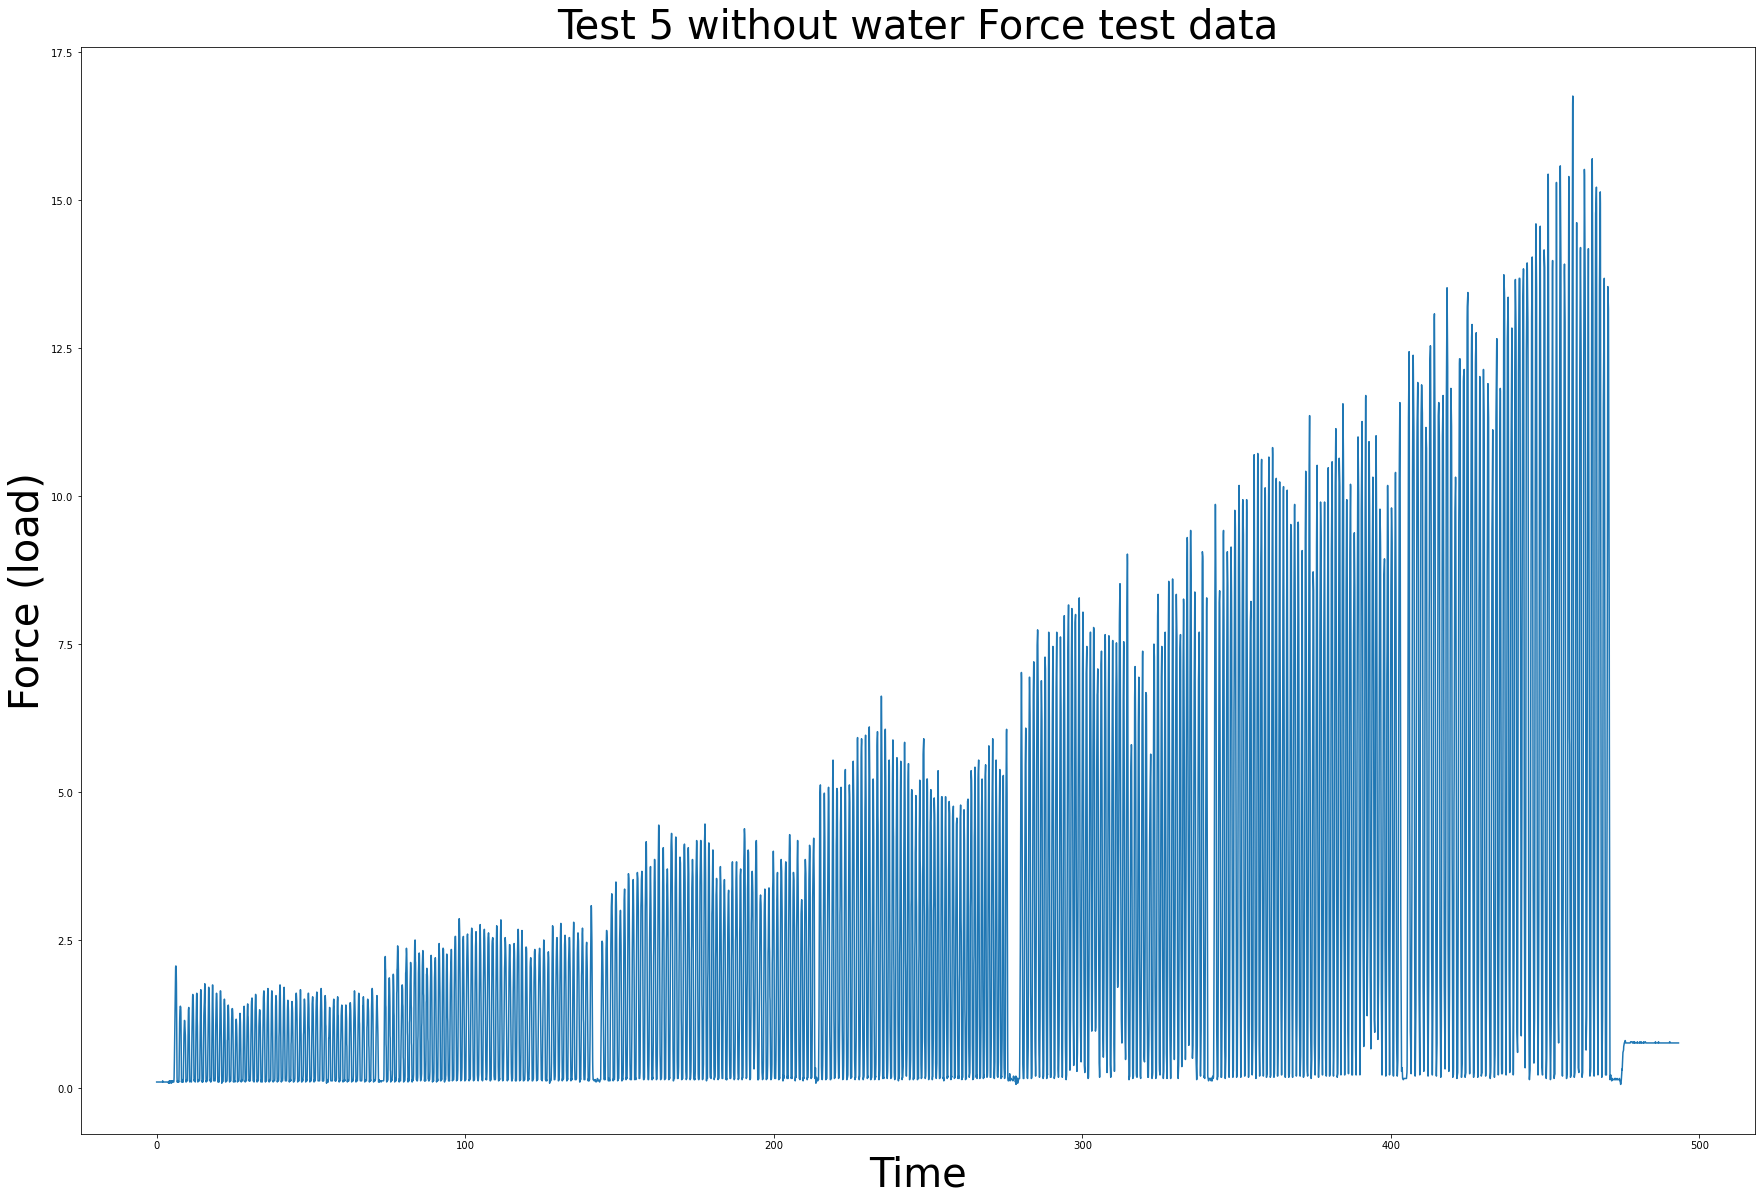

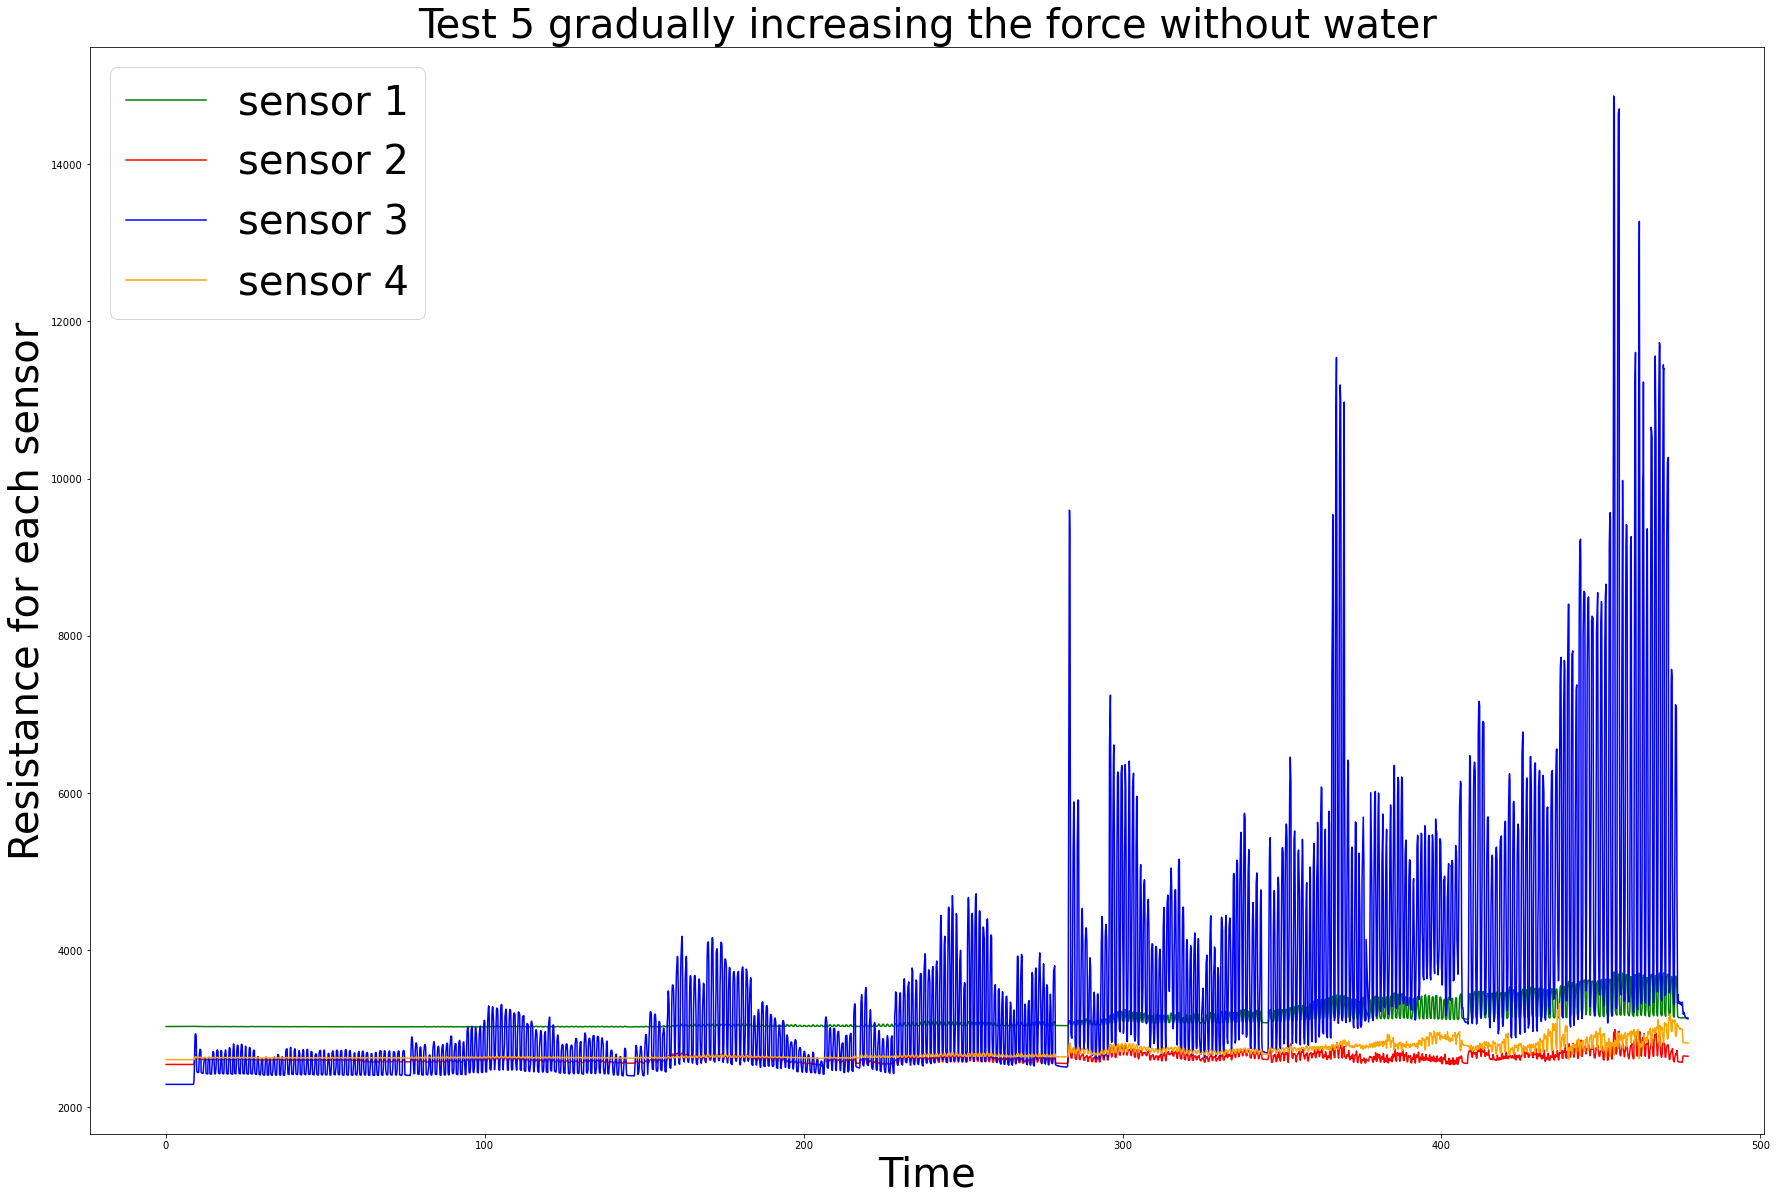

In [30]:
#without water 

#gradforce_wo

timeforce5_wo = gradforce_wo["Time"].values.reshape(-1,1)
force5_wo = gradforce_wo["Load"]

fig, ax5_f2 = plt.subplots(figsize=(30,20))
ax5_f2.plot(timeforce5_wo,force5_wo)

plt.title("Test 5 without water Force test data",fontsize = fontsize)
plt.xlabel("Time",fontsize = fontsize)
plt.ylabel("Force (load)",fontsize = fontsize)
ax5_f2


time5_wo= grad_wo["SMU-1 Time (s)"].values.reshape(-1,1)

t5wo_r1 = grad_wo["SMU-1 Voltage (V)"]/grad_wo["SMU-1 Current (A)"]
t5wo_r2 = grad_wo["SMU-2 Voltage (V)"]/grad_wo["SMU-2 Current (A)"]
t5wo_r3 = grad_wo["SMU-3 Voltage (V)"]/grad_wo["SMU-3 Current (A)"]
t5wo_r4 = grad_wo["SMU-4 Voltage (V)"]/grad_wo["SMU-4 Current (A)"]

fig, ex5_2 = plt.subplots(figsize=(30,20))
ex5_2.plot(time5_wo,t5wo_r1, color = 'green', label = 'sensor 1')
ex5_2.plot(time5_wo,t5wo_r2, color = 'red', label = 'sensor 2')
ex5_2.plot(time5_wo,t5wo_r3, color = 'blue', label = 'sensor 3')
ex5_2.plot(time5_wo,t5wo_r4, color = 'orange', label = 'sensor 4')
plt.title("Test 5 gradually increasing the force without water",fontsize = fontsize)
plt.xlabel("Time",fontsize = fontsize)
plt.ylabel("Resistance for each sensor",fontsize = fontsize)
ex5_2.legend(loc = 'upper left',fontsize = fontsize)

ex5_2

# Data for sensor number 3 - Test 5 

In [31]:
t5wo_r4.shape

(3658,)

In [6]:
#find the peak
#check the length of the peaks 
#check the timing of the peaks 
#time5_wo ,t5wo_r3
#timeforce5_wo , force5_wo
#tranformed_t5wo_r3 = t5wo_r3.shift(periods)
peaks_sensordatar3, _ = find_peaks(t5wo_r3,height = 2500)
#peaks_sensordatar3, _ = find_peaks(t5wo_r3)

peaks_forcedatar3, _ = find_peaks(force5_wo,height = 1 , distance = 1)
#peaks_forcedatar3, _ = find_peaks(force5_wo)
# f = t5wo_r3.isna()

# print(t5wo_r3[f])


Text(0, 0.5, 'resistance')

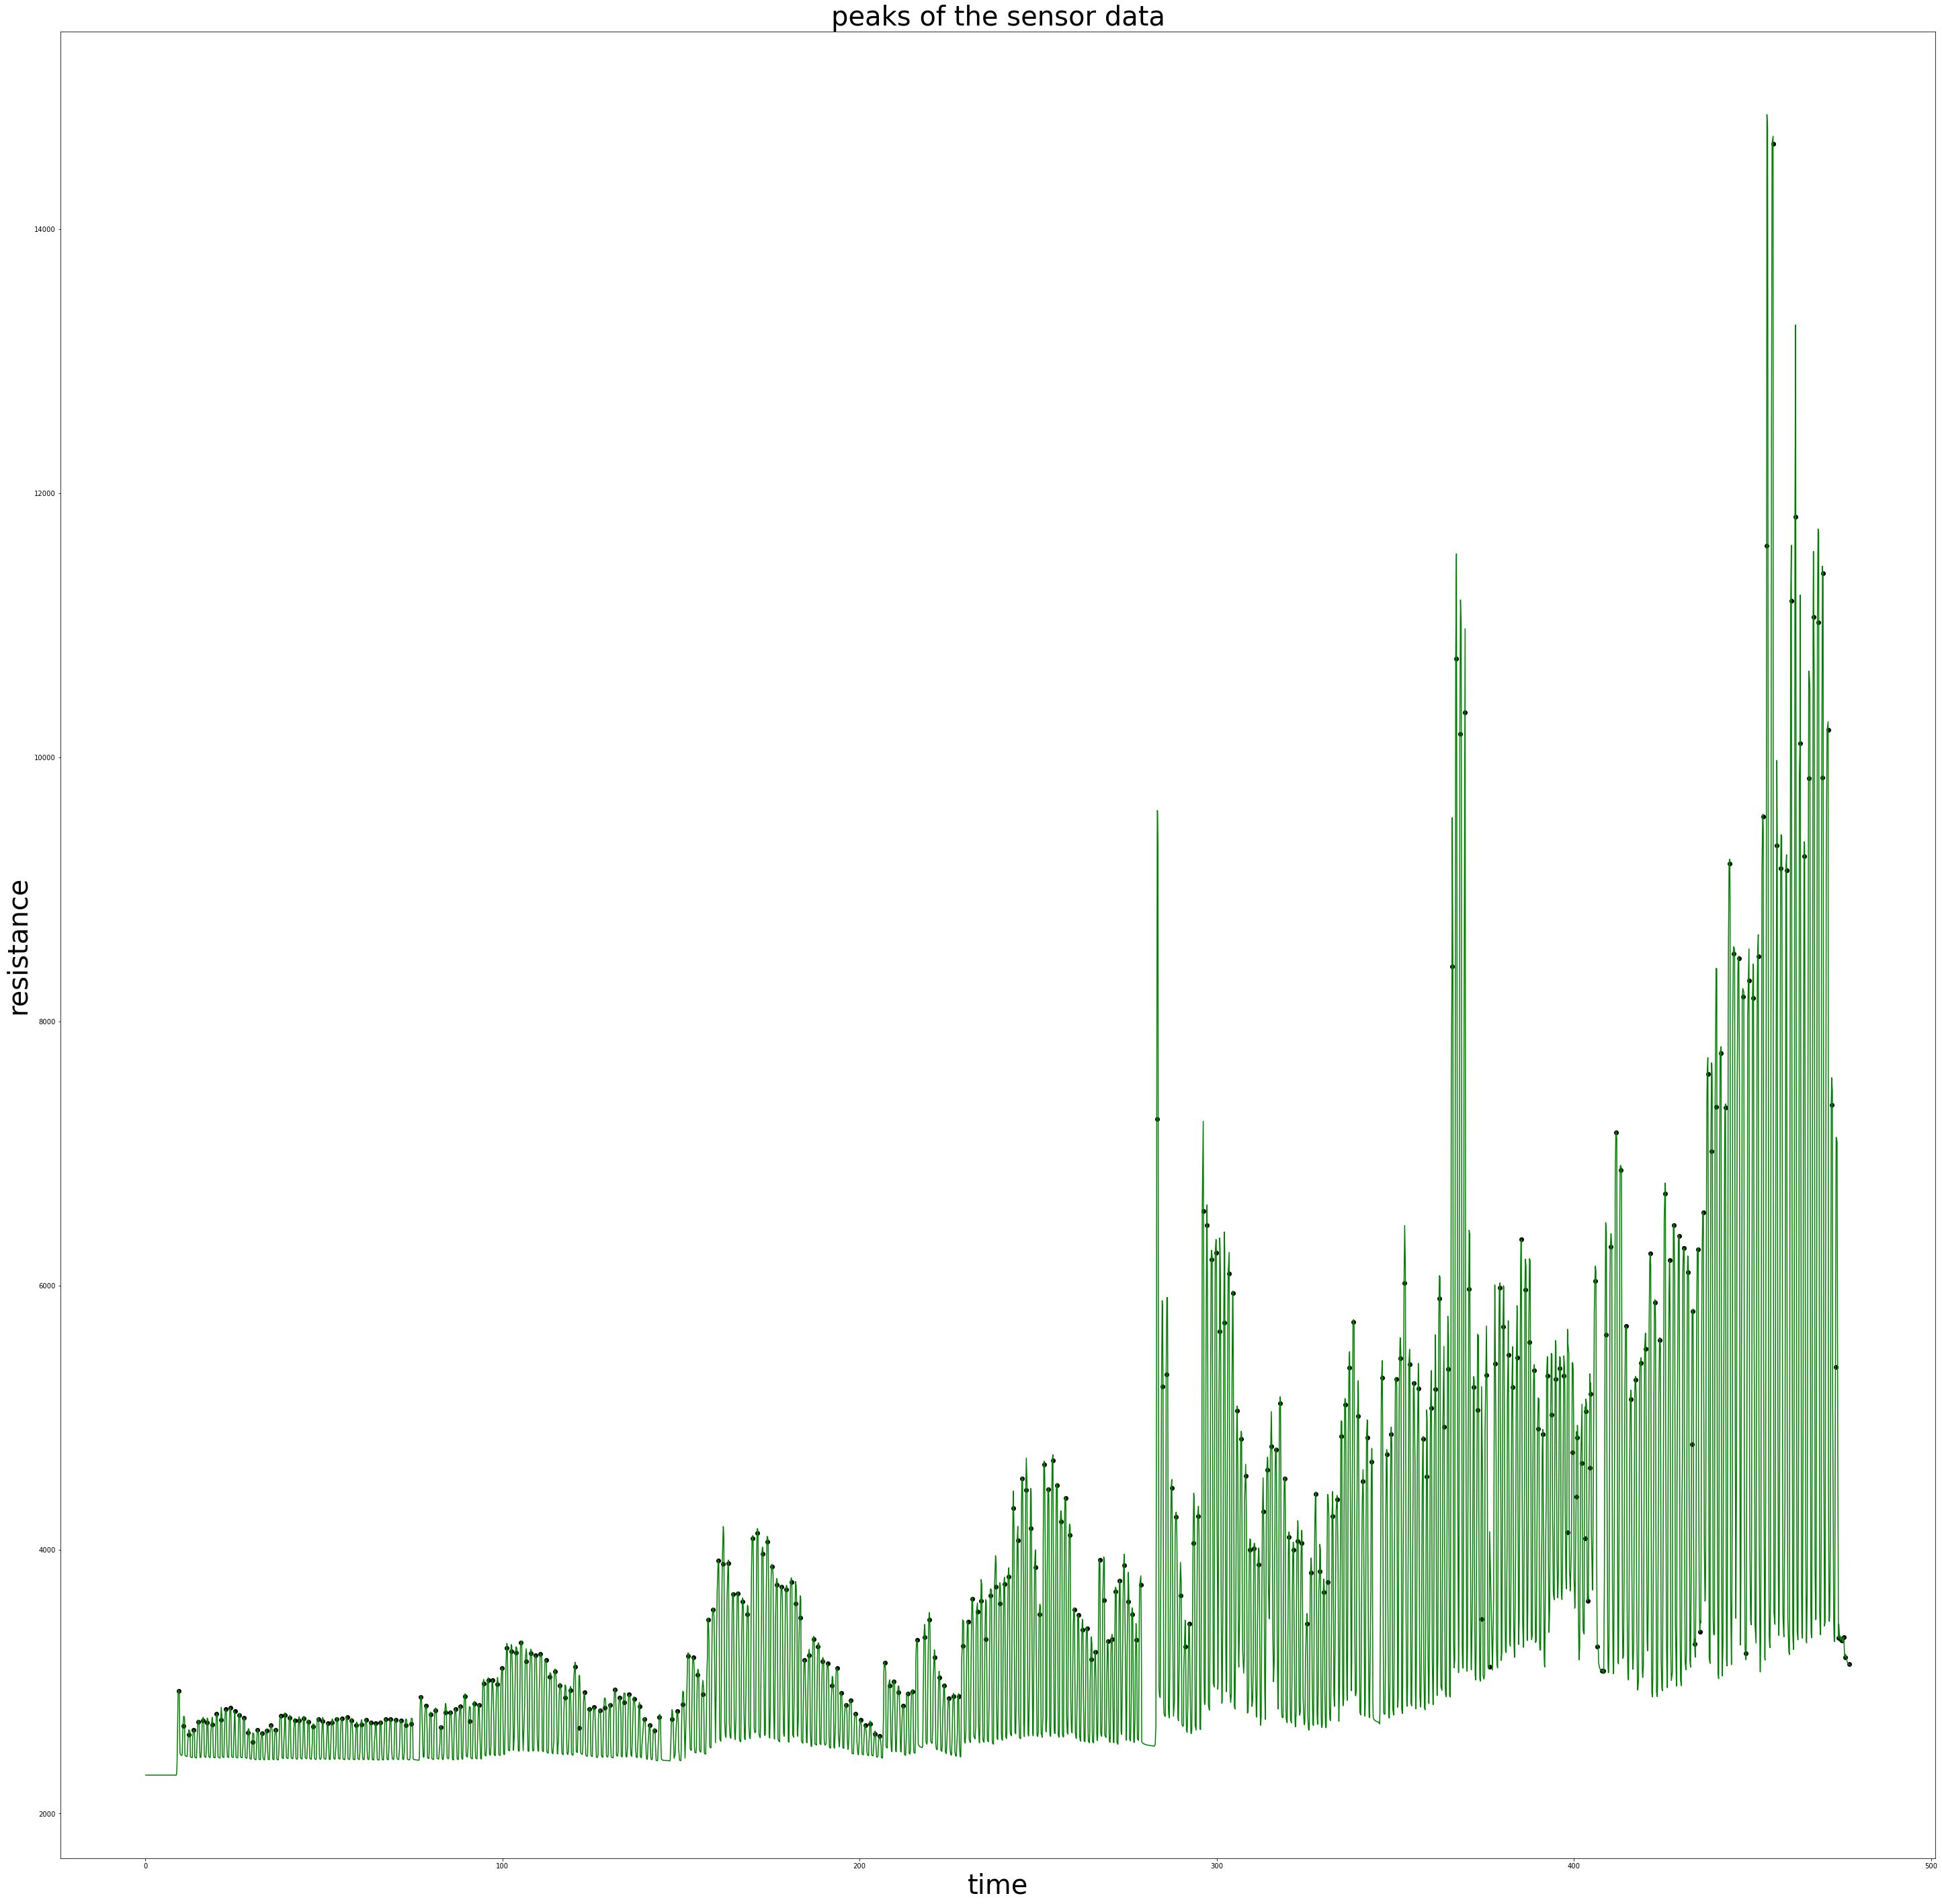

In [7]:
plt.figure(figsize=(50, 50))

plt.plot(time5_wo,t5wo_r3, color = 'green', label = 'sesnor original data')
plt.scatter(time5_wo[peaks_sensordatar3],t5wo_r3[peaks_sensordatar3], color = 'black', label = 'sensor 3')
plt.title("peaks of the sensor data",fontsize = fontsize)
plt.xlabel("time",fontsize = fontsize)
plt.ylabel("resistance",fontsize = fontsize)

Text(0, 0.5, 'load')

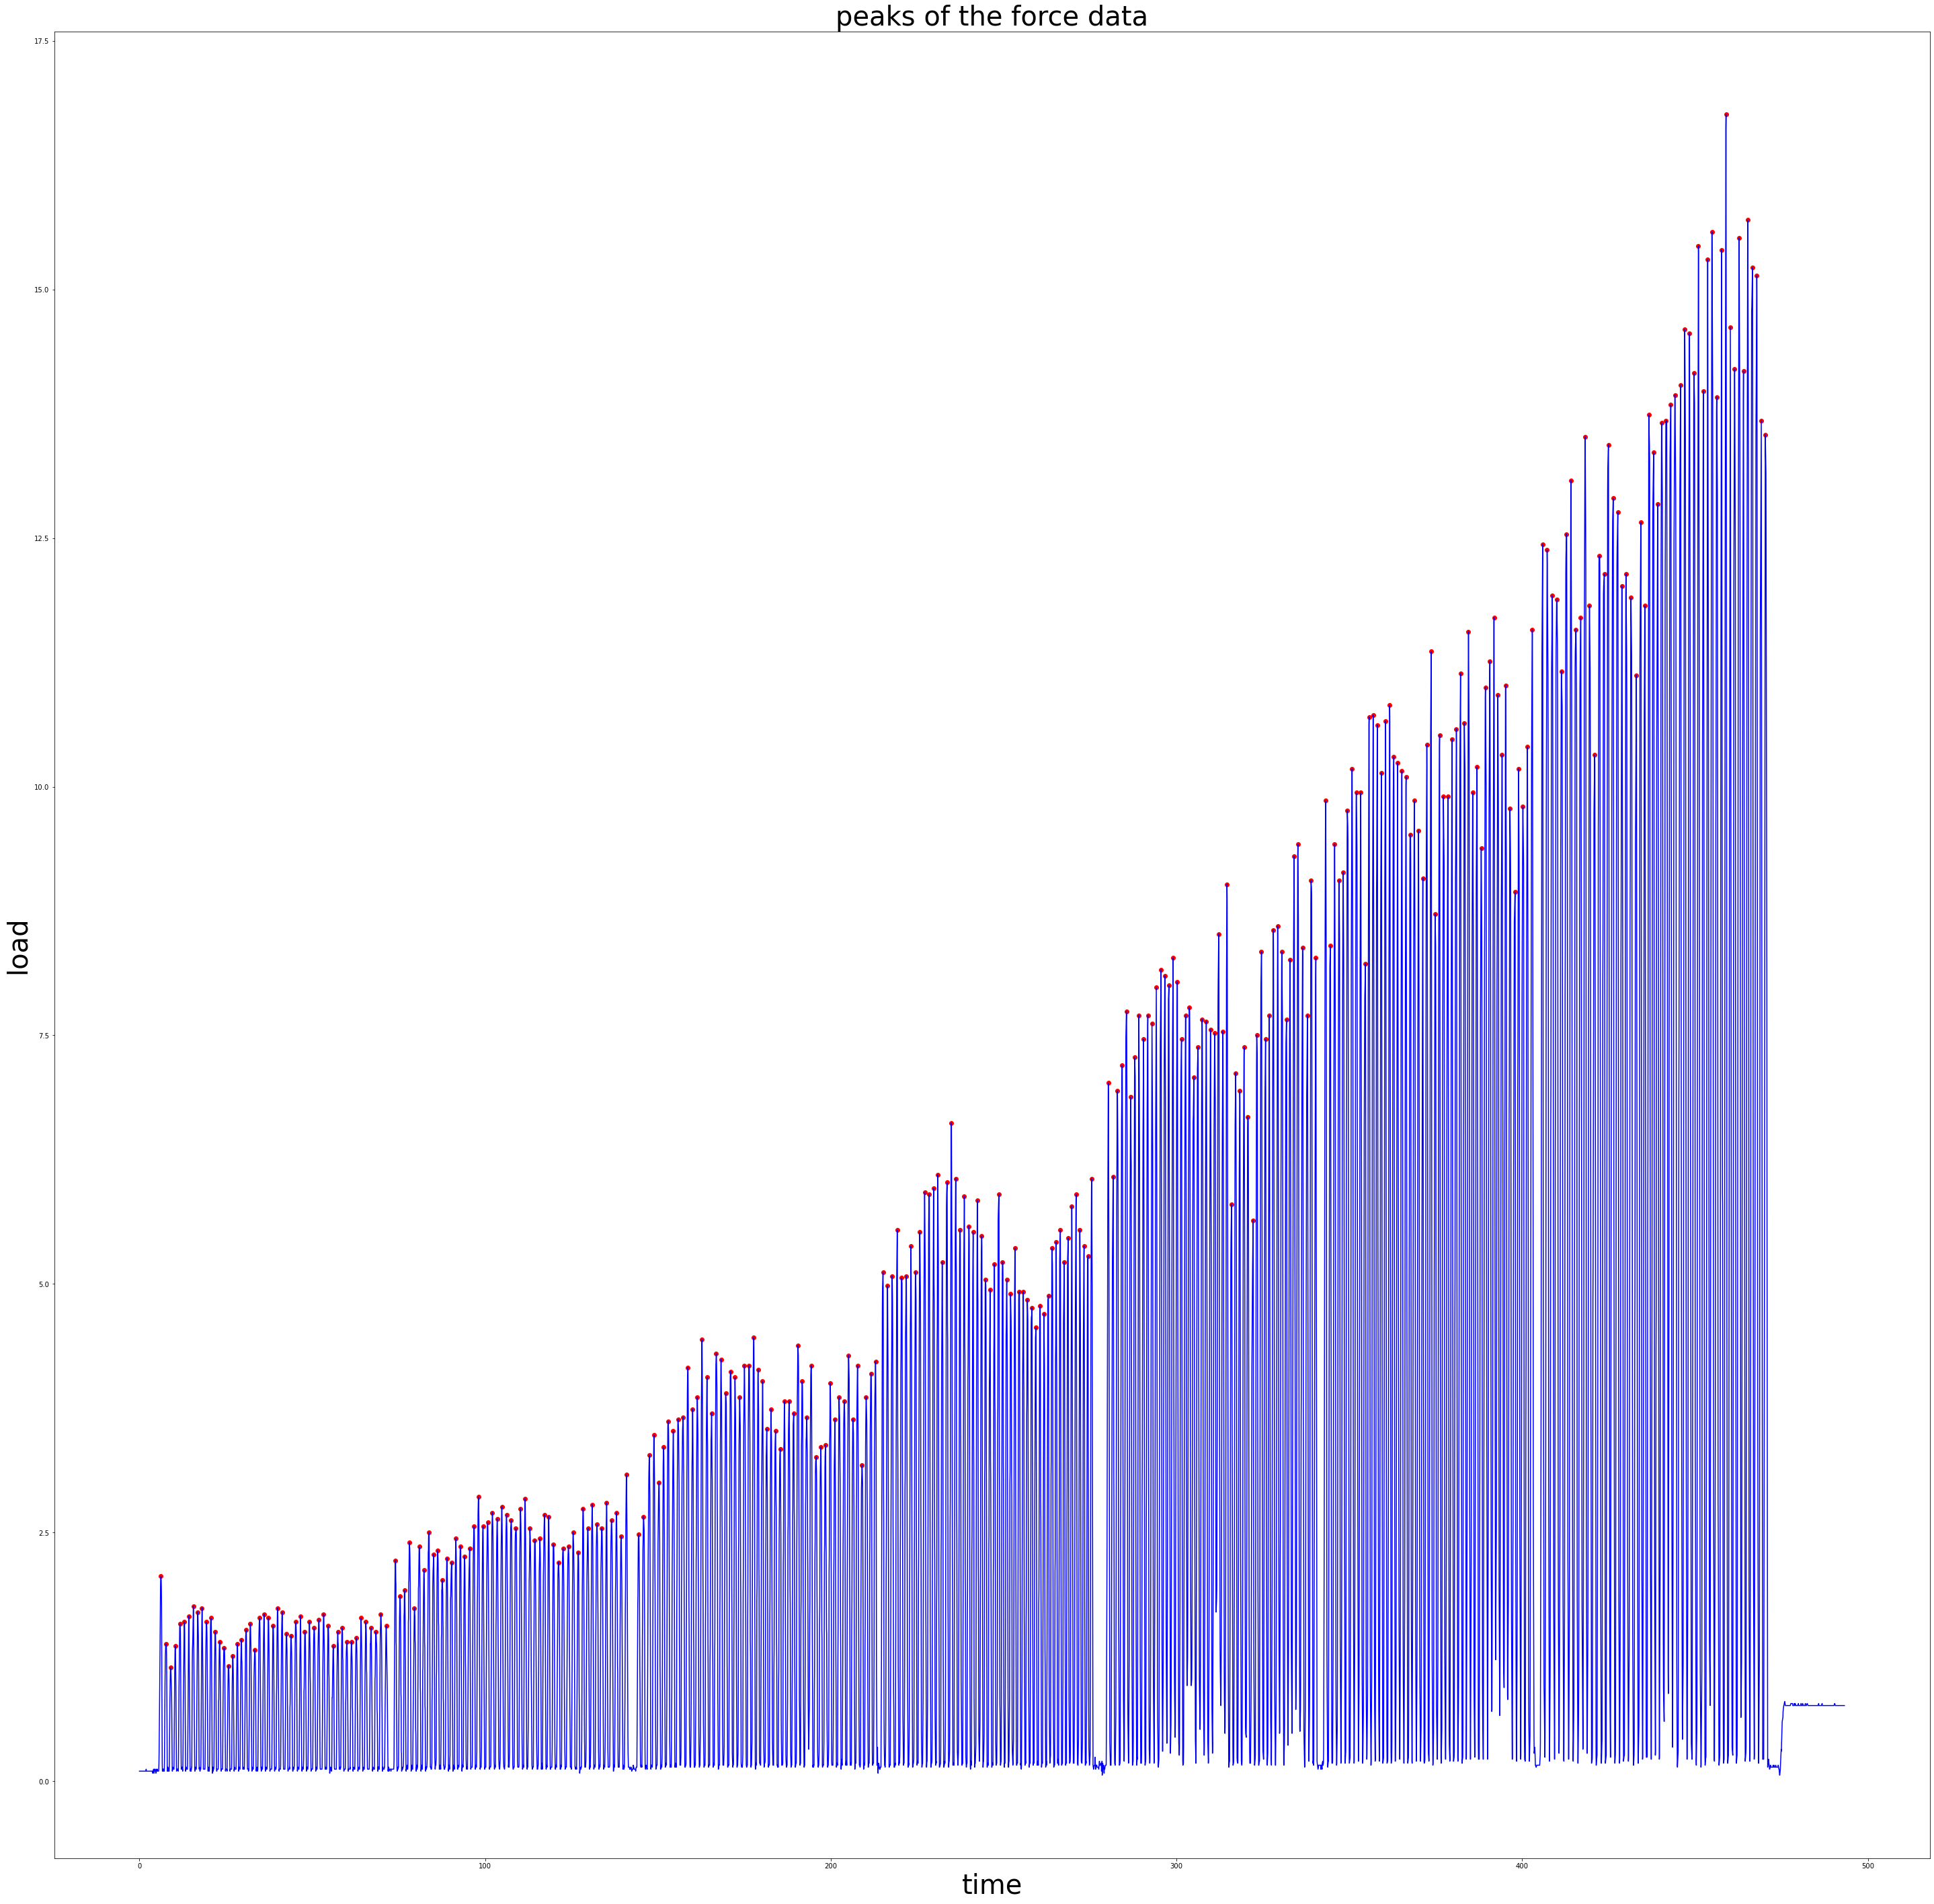

In [36]:
plt.figure(figsize=(50, 50))
plt.plot(timeforce5_wo,force5_wo, color = 'blue', label = 'sesnor original data')
plt.scatter(timeforce5_wo[peaks_forcedatar3],force5_wo[peaks_forcedatar3], color = 'red', label = 'foce')

plt.title("peaks of the force data",fontsize = fontsize)
plt.xlabel("time",fontsize = fontsize)
plt.ylabel("load",fontsize = fontsize)

In [33]:
print(t5wo_r3.shape)
print(force5_wo.shape)

(3658,)
(6153,)


Text(0, 0.5, 'resistance')

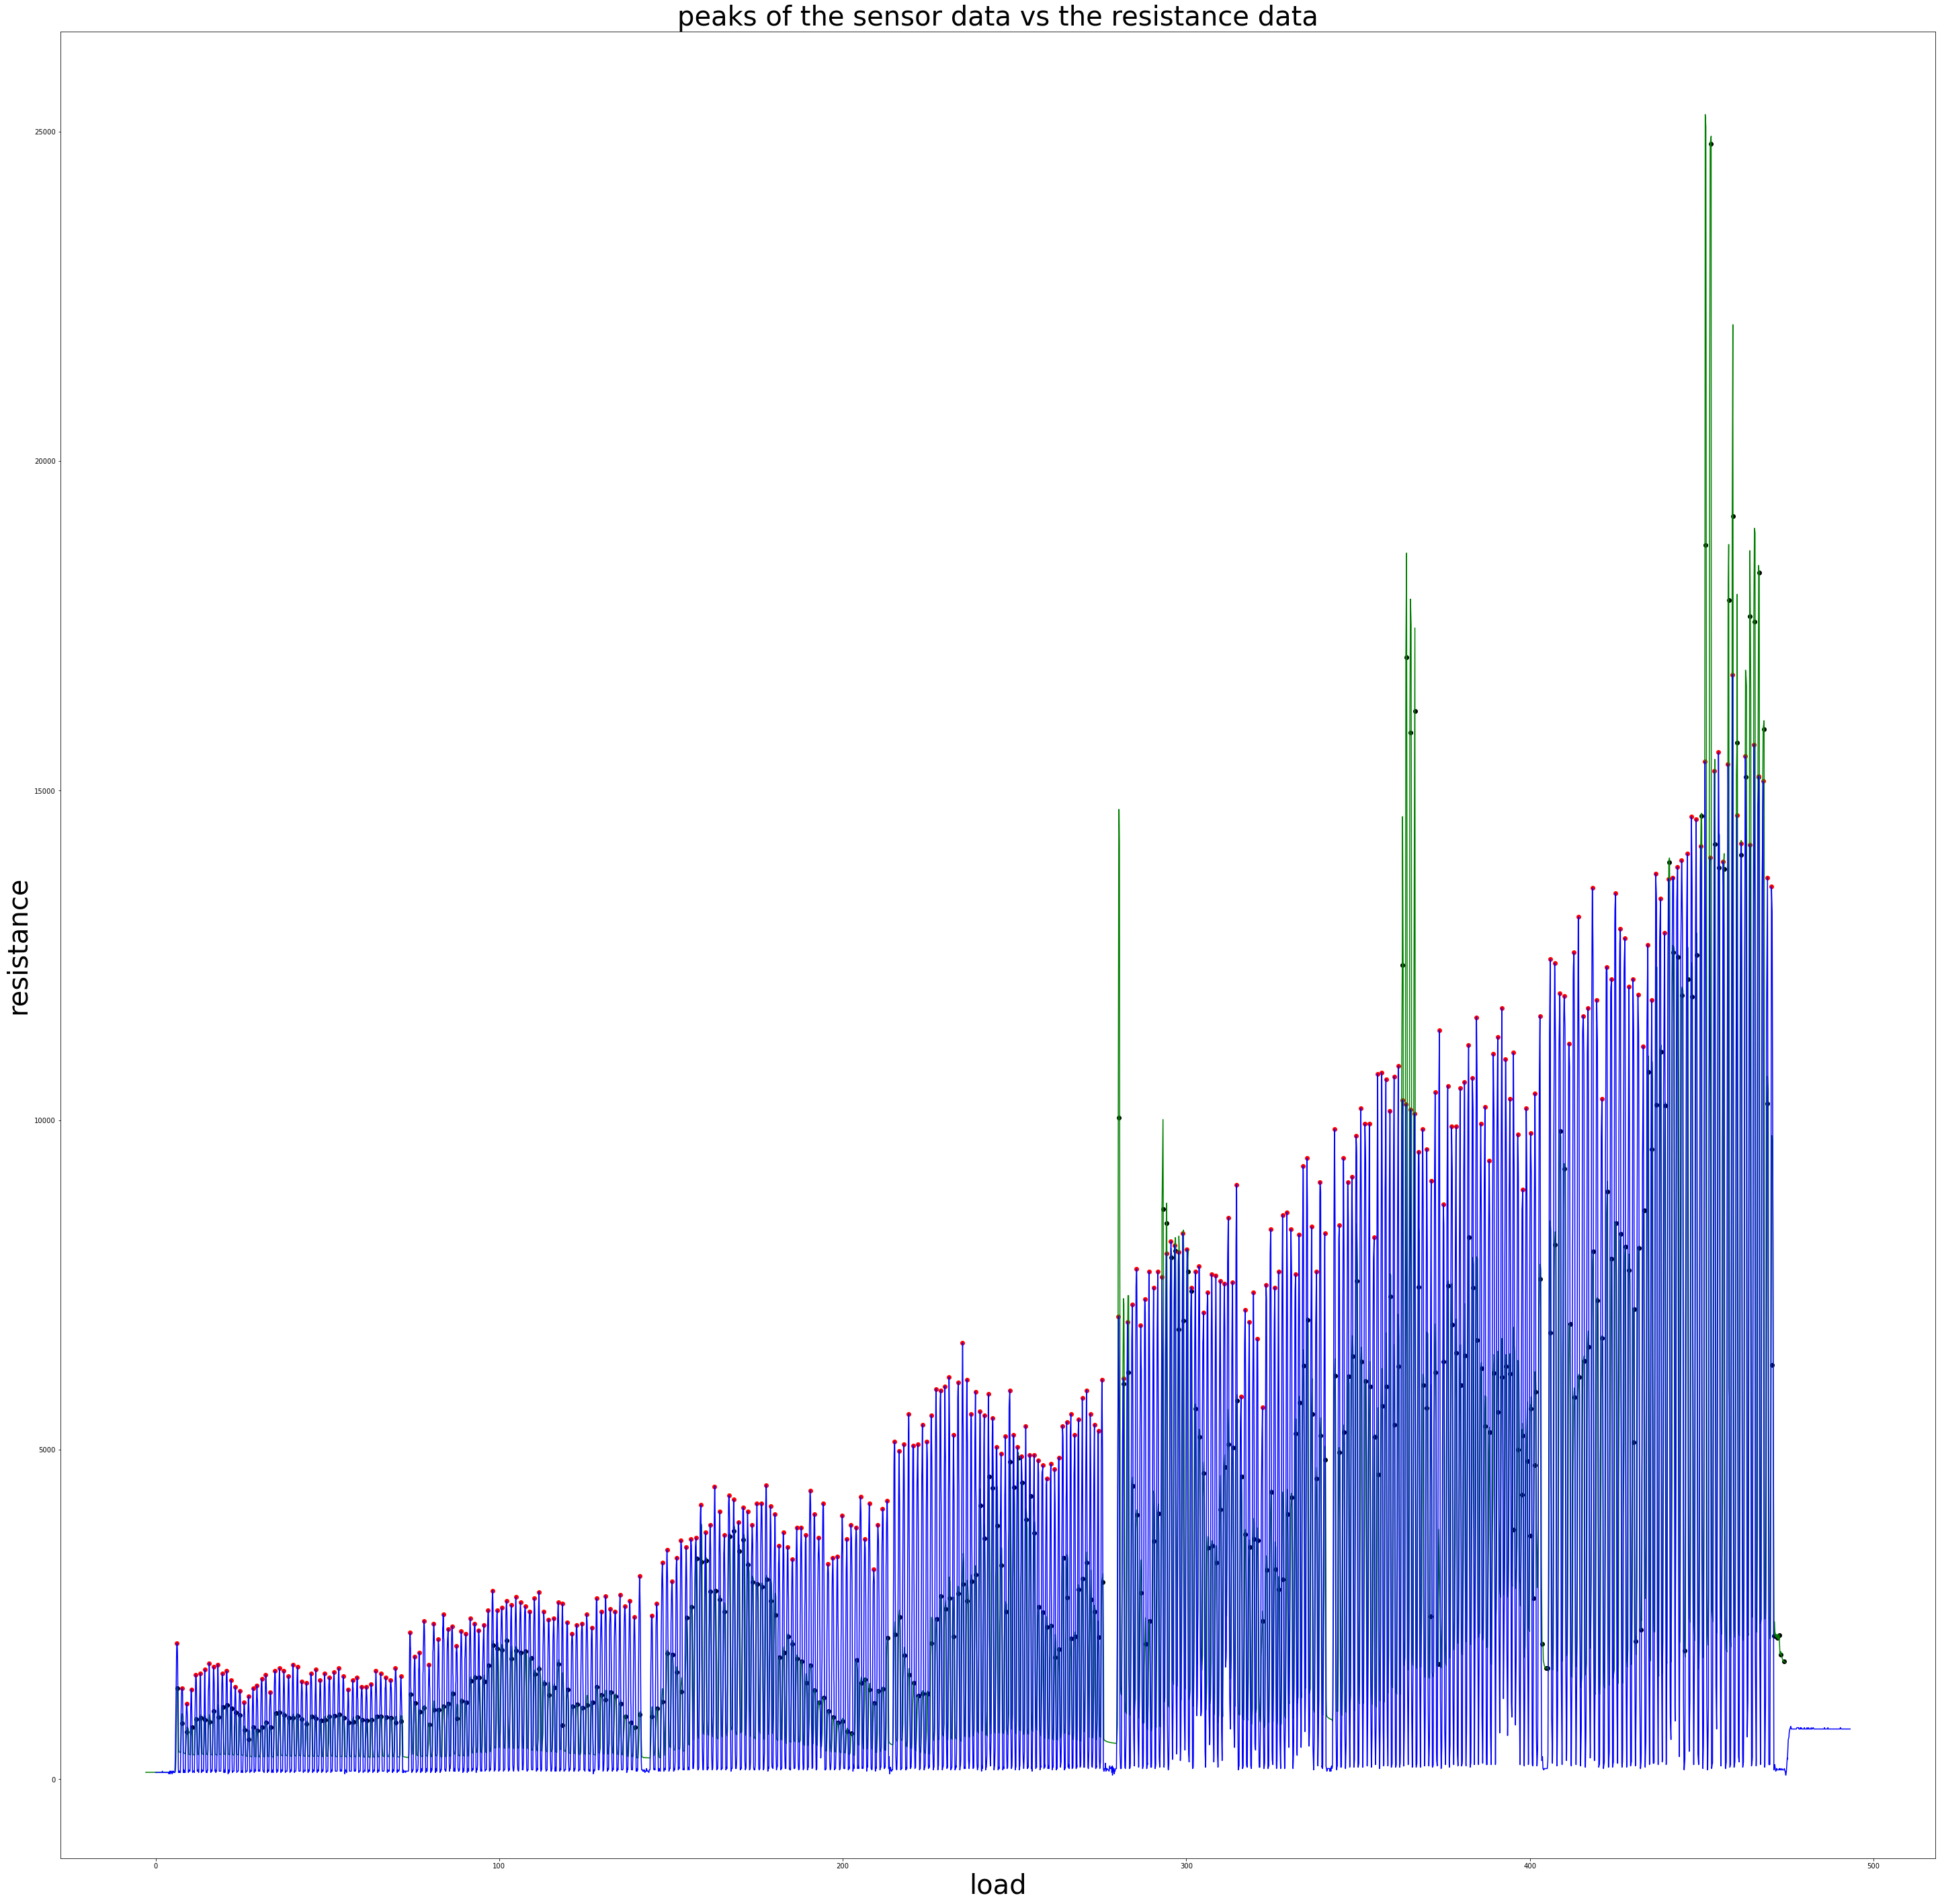

In [9]:
#plotting the load vs resistance
time5_wo_new = time5_wo - 3

transformed_sensor3data = np.multiply(np.subtract(t5wo_r3,2240),2)
transformed_sensor3data_peak = np.multiply(np.subtract(t5wo_r3[peaks_sensordatar3],2240),2)

#aligning the data


transformed_forcedata = np.multiply(force5_wo,1000)
transformed_forcedata_peak = np.multiply(force5_wo[peaks_forcedatar3],1000)

plt.figure(figsize=(50, 50))

#plt.plot(time5_wo,transformed_sensor3data, color = 'green', label = 'sesnor original data')
plt.plot(time5_wo_new,transformed_sensor3data, color = 'green', label = 'sesnor original data')
plt.scatter(time5_wo_new[peaks_sensordatar3],transformed_sensor3data_peak, color = 'black', label = 'sensor 3')

plt.plot(timeforce5_wo,transformed_forcedata, color = 'blue', label = 'sesnor original data')
plt.scatter(timeforce5_wo[peaks_forcedatar3],transformed_forcedata_peak, color = 'red', label = 'foce')


plt.title("peaks of the sensor data vs the resistance data",fontsize = fontsize)
plt.xlabel("load",fontsize = fontsize)
plt.ylabel("resistance",fontsize = fontsize)

# plt.title("peaks of the force data",fontsize = fontsize)
# plt.xlabel("time",fontsize = fontsize)
# plt.ylabel("load",fontsize = fontsize)

Text(0, 0.5, 'resistance')

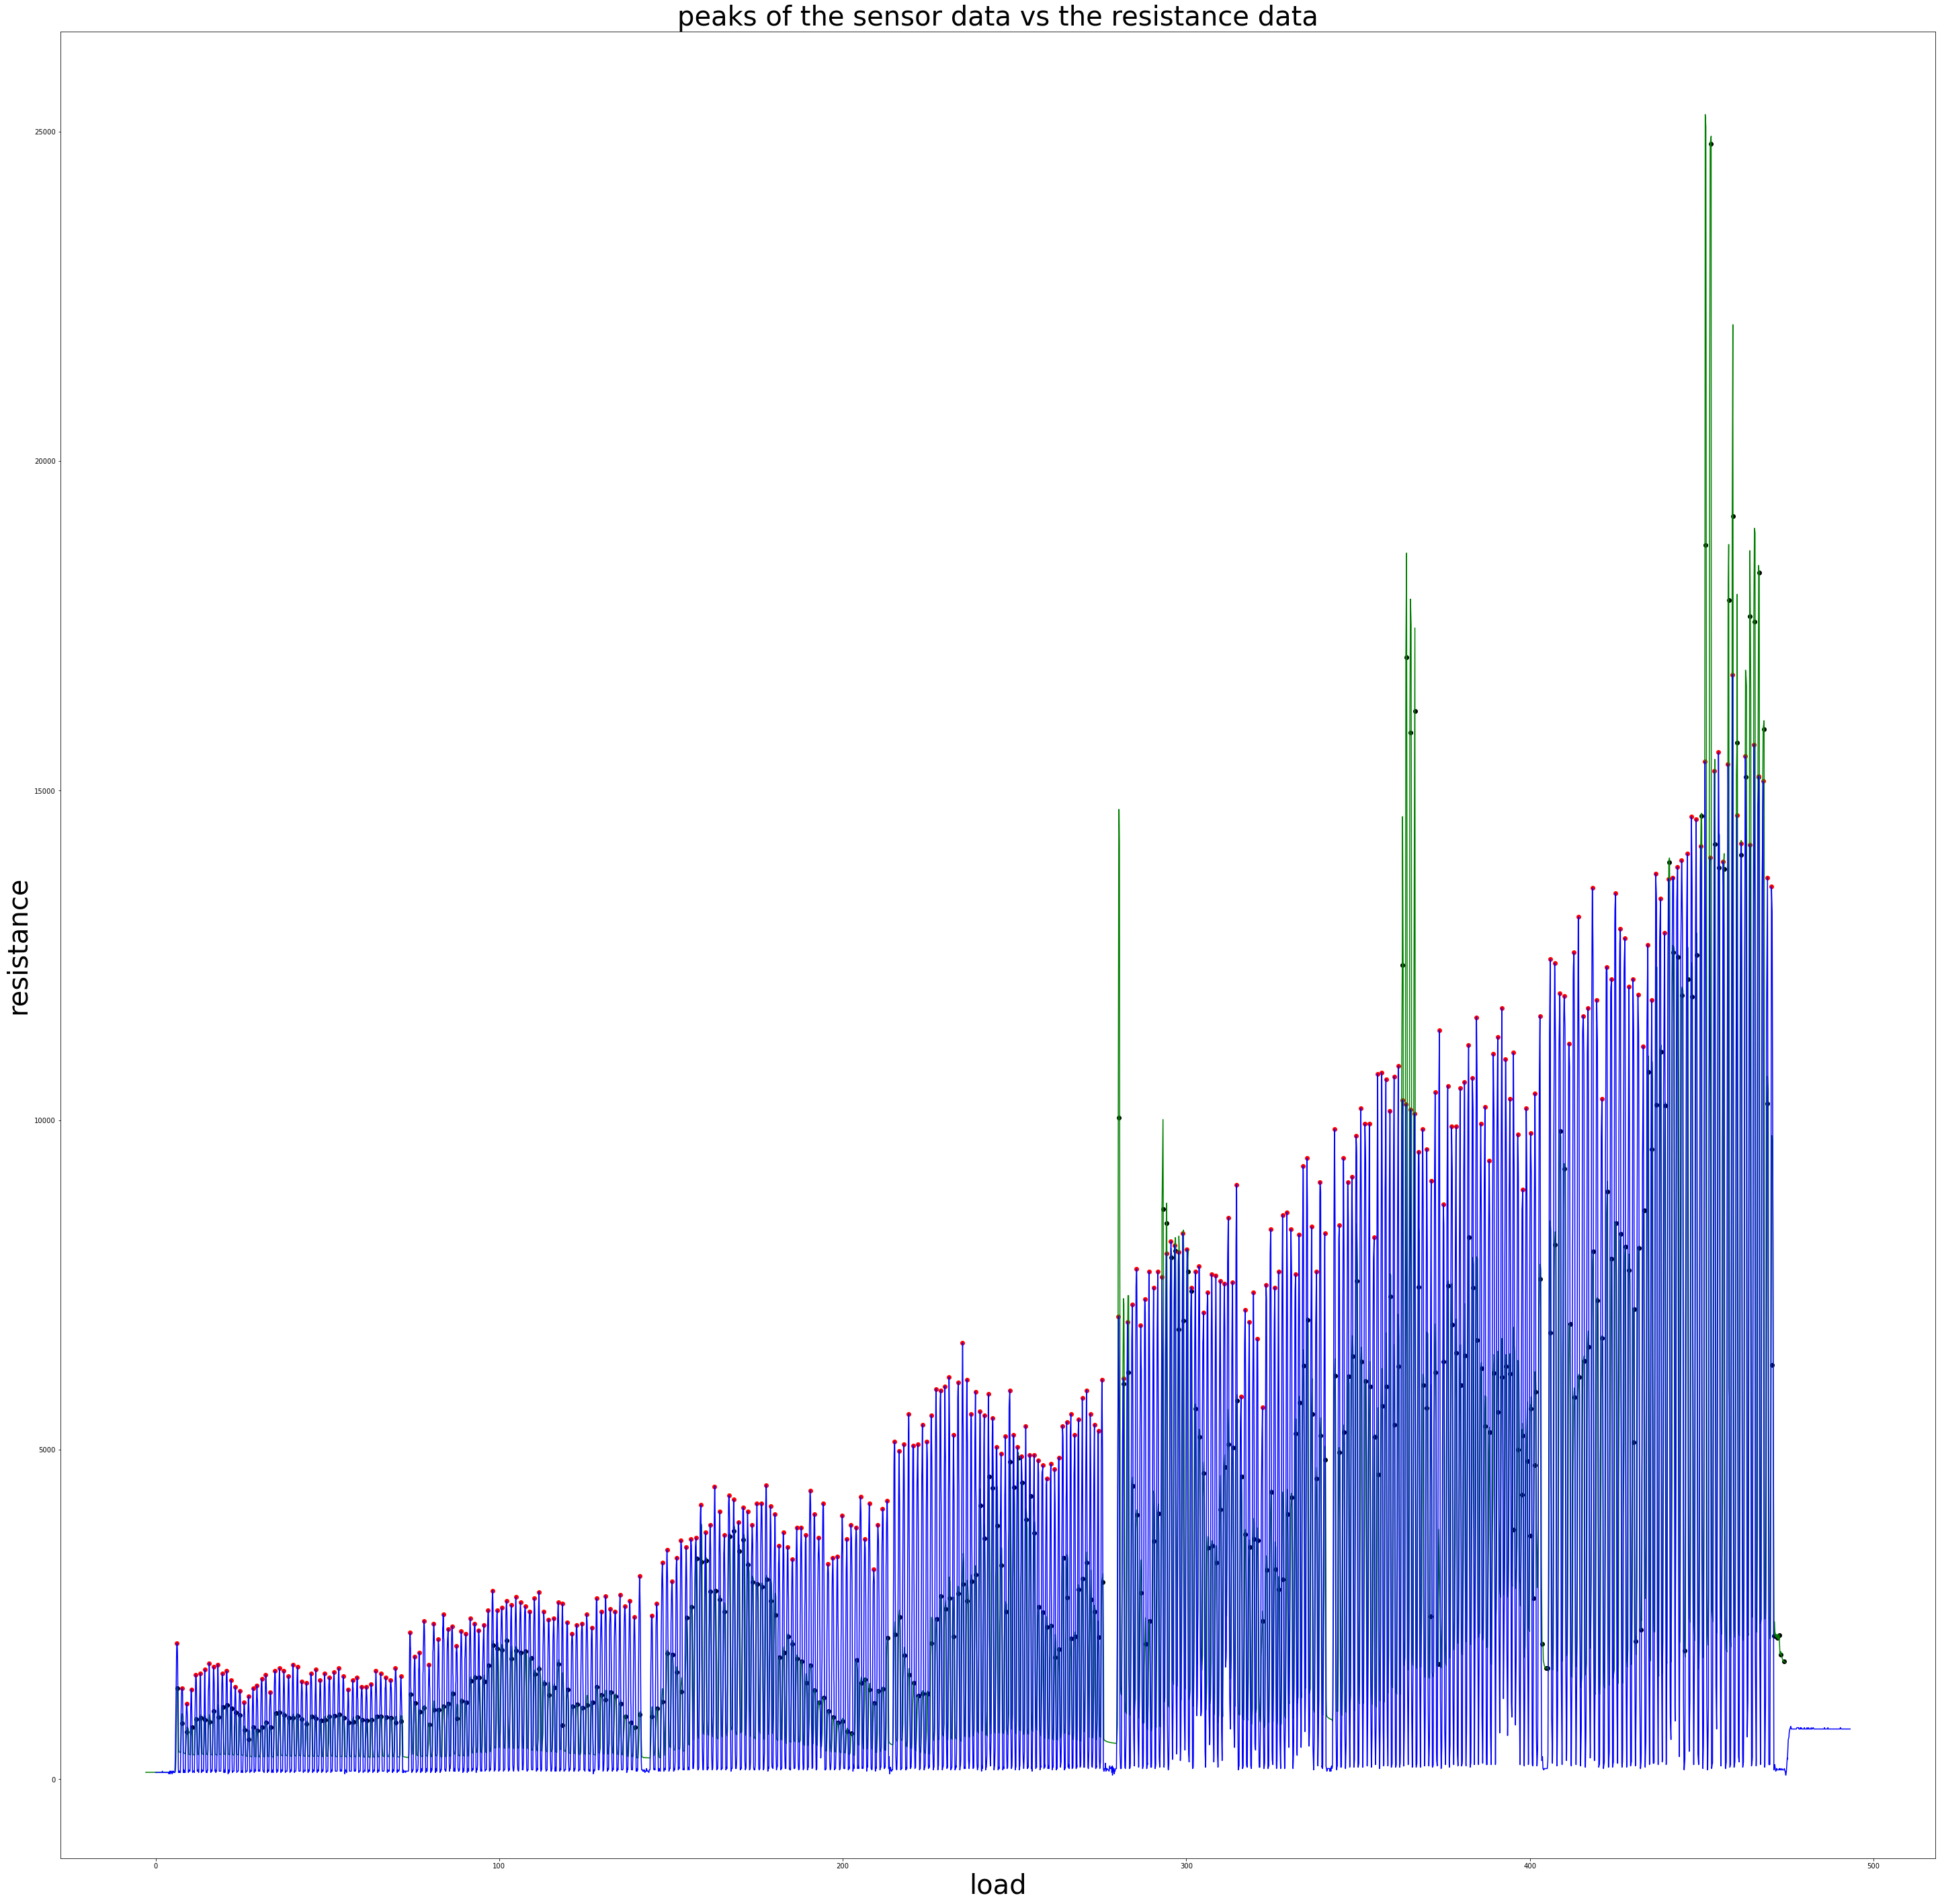

In [10]:
#plotting the load vs resistance
time5_wo_new = time5_wo - 3

transformed_sensor3data = np.multiply(np.subtract(t5wo_r3,2240),2)
transformed_sensor3data_peak = np.multiply(np.subtract(t5wo_r3[peaks_sensordatar3],2240),2)

#aligning the data


transformed_forcedata = np.multiply(force5_wo,1000)
transformed_forcedata_peak = np.multiply(force5_wo[peaks_forcedatar3],1000)

plt.figure(figsize=(50, 50))

#plt.plot(time5_wo,transformed_sensor3data, color = 'green', label = 'sesnor original data')
plt.plot(time5_wo_new,transformed_sensor3data, color = 'green', label = 'sesnor original data')
plt.scatter(time5_wo_new[peaks_sensordatar3],transformed_sensor3data_peak, color = 'black', label = 'sensor 3')

plt.plot(timeforce5_wo,transformed_forcedata, color = 'blue', label = 'sesnor original data')
plt.scatter(timeforce5_wo[peaks_forcedatar3],transformed_forcedata_peak, color = 'red', label = 'foce')


plt.title("peaks of the sensor data vs the resistance data",fontsize = fontsize)
plt.xlabel("load",fontsize = fontsize)
plt.ylabel("resistance",fontsize = fontsize)

# plt.title("peaks of the force data",fontsize = fontsize)
# plt.xlabel("time",fontsize = fontsize)
# plt.ylabel("load",fontsize = fontsize)

In [34]:
print(transformed_sensor3data.shape)
print(transformed_forcedata.shape)

(3658,)
(6153,)


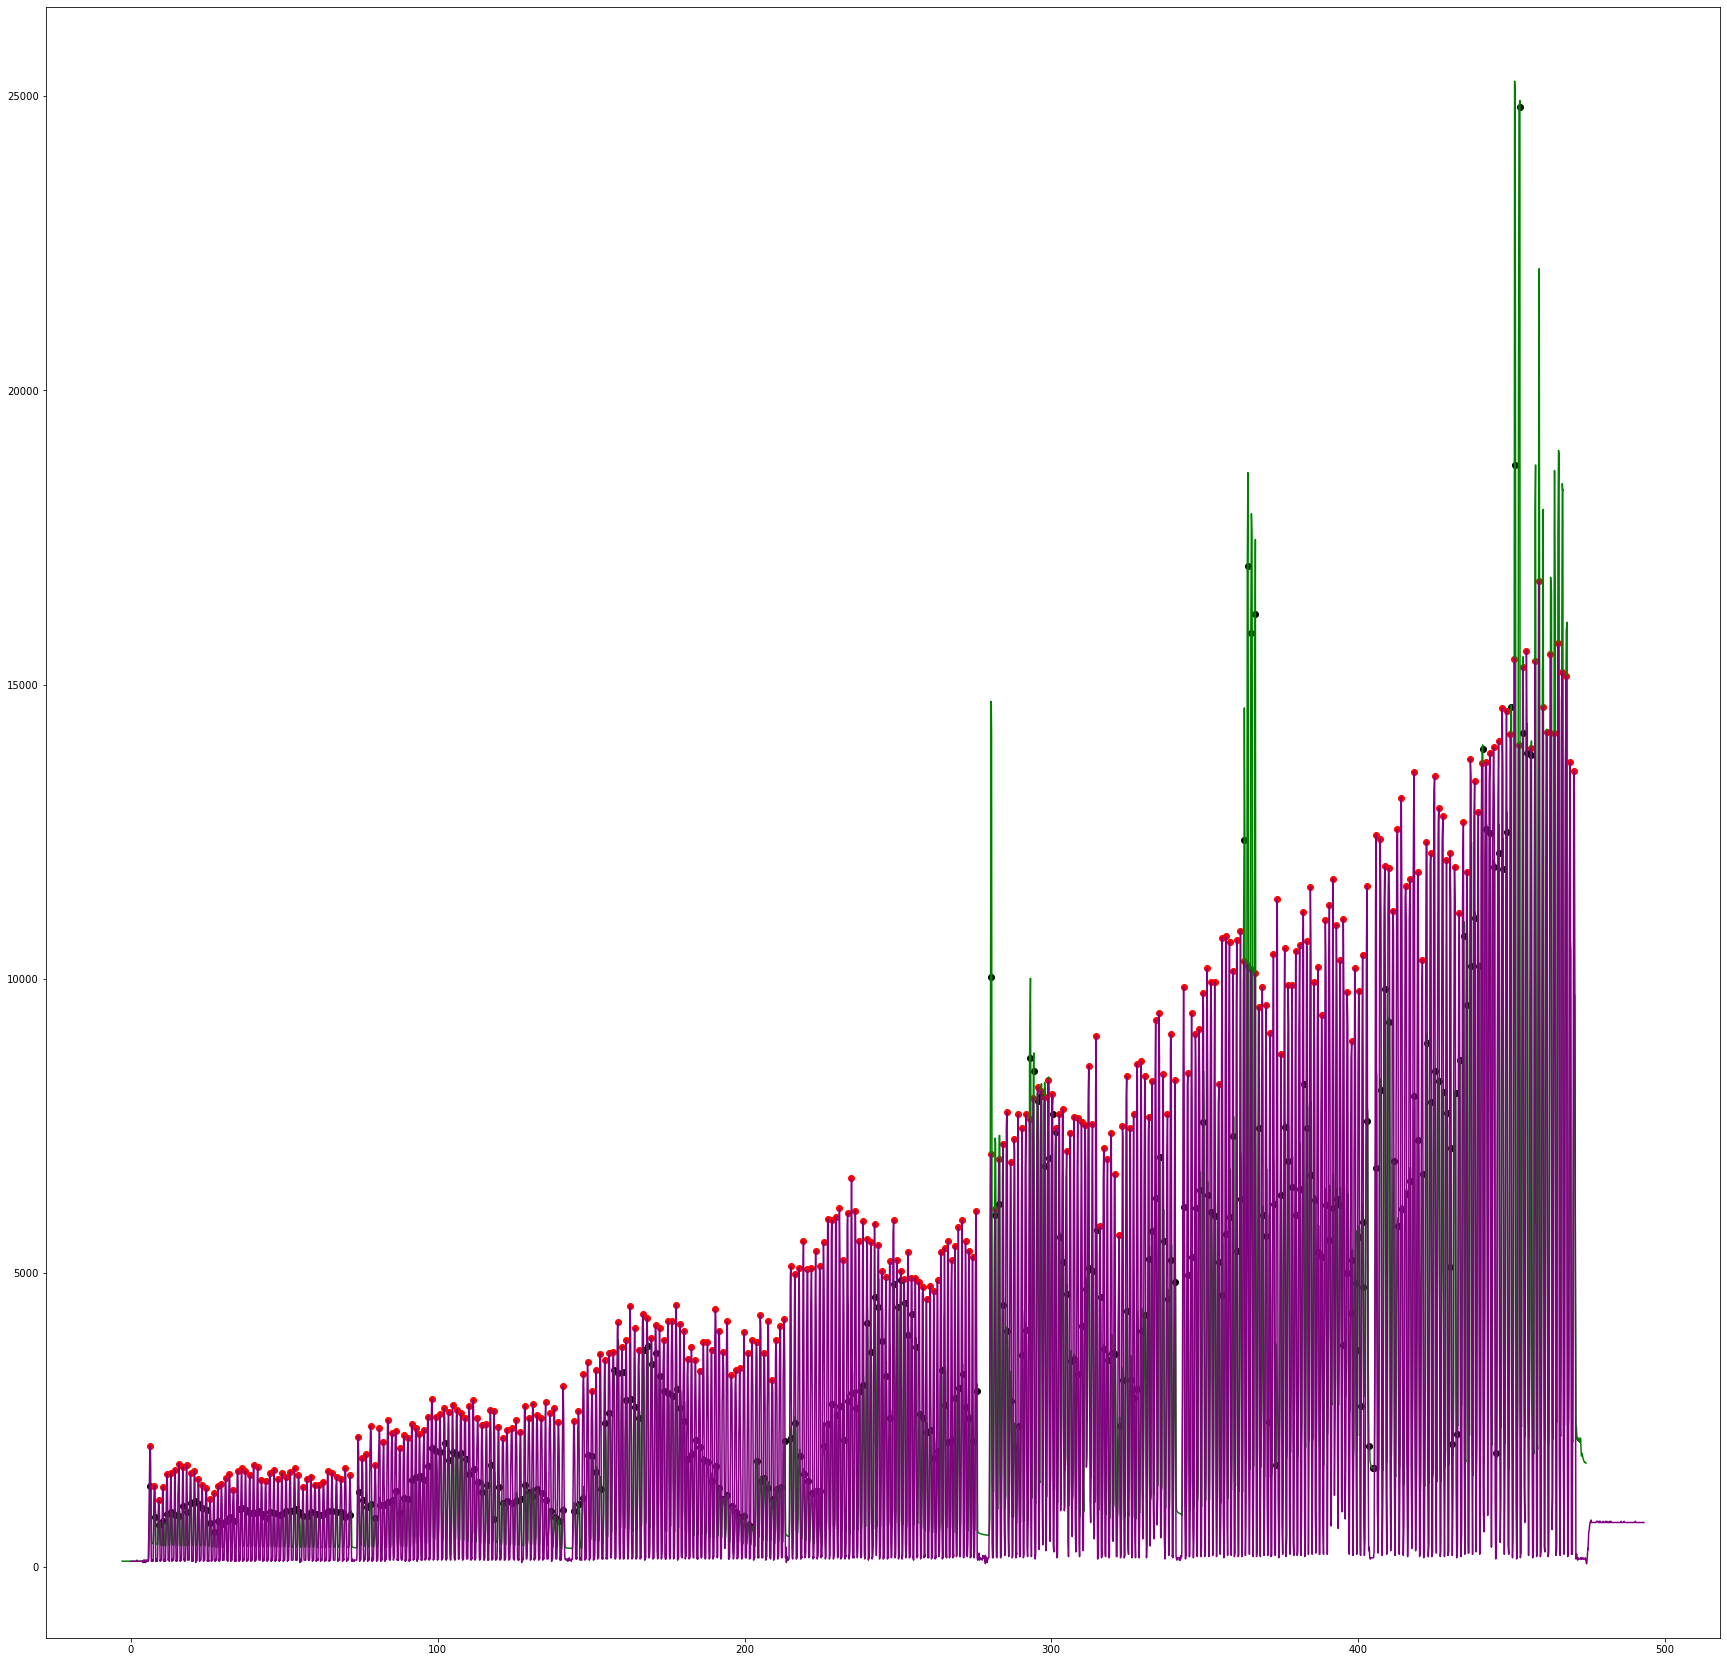

In [11]:
slice1_r = transformed_sensor3data.iloc[0:3658]
slicedpeaks_r = transformed_sensor3data_peak.iloc[0:352]
slice1_f = transformed_forcedata.iloc[0:6153]
slicedpeaks_f = transformed_forcedata_peak.iloc[0:352]

plt.figure(figsize=(30, 30))

plt.plot(time5_wo_new[0:3658],slice1_r, color = 'green', label = 'sesnor original data')
plt.scatter(time5_wo_new[peaks_sensordatar3[0:352]],slicedpeaks_r, color = 'black', label = 'sensor 3')

plt.plot(timeforce5_wo[0:6153],slice1_f, color = 'purple', label = 'sesnor original data')
plt.scatter(timeforce5_wo[peaks_forcedatar3[0:352]],slicedpeaks_f, color = 'red', label = 'foce')




Text(0, 0.5, 'load')

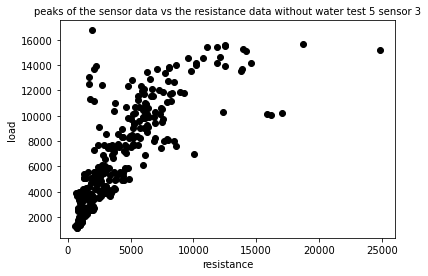

In [12]:
plt.scatter(slicedpeaks_r,slicedpeaks_f, color = 'black', label = 'peaks')
#transformed_forcedata_peak.shape
plt.title("peaks of the sensor data vs the resistance data without water test 5 sensor 3",fontsize = 10)
plt.xlabel("resistance",fontsize = 10)
plt.ylabel("load",fontsize = 10)

In [13]:
#Splitting the data into train and test
train_r, test_r, train_f, test_f = train_test_split(slicedpeaks_r,slicedpeaks_f,test_size = 0.25,random_state = 0)

In [14]:
test_f.shape

(88,)

In [15]:
##Model:Y=b⋅(1−e^t−k⋅X)
## functions
def negative_exponential(x, b, k):
    return b * (1 - np.exp(-k * x))


def negative_exponential_jac(x, b, k):
    return np.array([1 - np.exp(-k * x), b * x * np.exp(-k * x)]).T


offset = 700
# fit
res, pcov = curve_fit(
    f=negative_exponential,
    jac=negative_exponential_jac,
    xdata=train_r,
    ydata=train_f + offset,
    p0=[300, 1e-3],  # the asymptote guess is 200 and the rate guess is 1e-3
    bounds=(0, [np.inf, 4]),  # adding constraints
)
b, k = res
print(res)

[1.50668552e+04 2.04539287e-04]


In [16]:
#Models to try:
#Linear regression

train_r_res = train_r.values.reshape(-1, 1)
test_r_res = test_r.values.reshape(-1,1)
linear_model = LinearRegression()

model_forcetest5s3 = linear_model.fit(train_r_res,train_f)
forcelin_predict = linear_model.predict(test_r_res)

fitted_linear = linear_model.predict(train_r_res)
#fitting a logarithmic model:
#y = a + b*ln(x)



In [17]:
# linear_model
# log_model
print(f'Final Training Accuracy: {linear_model.score(train_r_res,train_f)*100}%')
print(f'Model Accuracy: {linear_model.score(test_r_res,test_f)*100}%')


Final Training Accuracy: 62.99449929287295%
Model Accuracy: 70.54804173753368%


In [18]:
#Log model
log_model  = np.polyfit(np.log(train_r), train_f, 1)

forcelog_predict = - log_model[0]*np.log(test_r) + log_model[1]

fitted_forcelog = - log_model[0]*np.log(train_r) + log_model[1]
#print(forcelog_predict)


In [19]:
#negative exponensial model
#fitting negative exponential
force_expo = negative_exponential(test_r_res,res[0],res[1])

fitted_expo = negative_exponential(train_r_res,res[0],res[1])

In [20]:
#fitting a tree regressor model
tree_regressor = DecisionTreeRegressor(random_state = 0)
treemodel = tree_regressor.fit(train_r_res,train_f)
treemodel_predict = tree_regressor.predict(test_r_res)

In [21]:
print(f'Final Training Accuracy: {treemodel.score(train_r_res,train_f)*100}%')
print(f'Model Accuracy: {treemodel.score(test_r_res,test_f)*100}%')

Final Training Accuracy: 100.0%
Model Accuracy: 51.41987194781499%


In [22]:
# kf_w =KFold(n_splits=4, shuffle=True, random_state=20)

score_linear = cross_val_score(model_forcetest5s3, train_r_res,train_f, cv=4)
print(score_linear)

[0.64999973 0.44429251 0.60047382 0.68005603]


In [23]:
score_treeRegression = cross_val_score(treemodel, train_r_res,train_f, cv=4)
print(score_treeRegression)

[0.4350753  0.31099119 0.50902164 0.6451589 ]


In [24]:
score_negexpo = cross_val_score(fitted_expo, train_r_res,train_f, cv=4)
print(score_negexpo)

TypeError: estimator should be an estimator implementing 'fit' method, array([[ 2065.67866424],
       [10938.55620689],
       [ 3943.76855227],
       [ 9679.61835888],
       [ 2964.05541263],
       [ 4381.00816573],
       [ 9933.95579992],
       [11231.08521286],
       [12169.81003459],
       [ 2238.54474476],
       [ 7080.06194907],
       [ 6952.21094513],
       [ 3889.68331966],
       [10293.53524713],
       [ 9003.52136729],
       [ 4657.69730605],
       [ 6087.43390207],
       [10305.17237314],
       [10050.87631198],
       [11792.23167736],
       [ 9934.45845357],
       [10941.74567421],
       [ 3729.37173939],
       [ 2397.7903484 ],
       [ 9177.54272979],
       [ 2872.43000013],
       [10881.7160826 ],
       [ 8016.98323679],
       [12137.30030515],
       [ 9454.18170484],
       [ 6016.85152965],
       [ 6956.00423449],
       [11017.81058494],
       [ 6696.43755565],
       [ 5946.04760097],
       [ 2619.04764289],
       [ 2530.40469657],
       [ 5593.88633315],
       [11049.53275349],
       [ 2658.48043525],
       [ 6520.37883476],
       [ 2416.70127454],
       [ 3031.7886921 ],
       [13050.95614801],
       [10213.89355242],
       [13738.34907023],
       [ 7312.54854678],
       [ 3517.47358617],
       [ 6238.97448659],
       [ 2632.54706962],
       [11391.76128968],
       [ 8619.37150032],
       [ 4954.86998544],
       [ 3356.78339051],
       [12931.58565808],
       [ 4748.5148474 ],
       [ 3511.3969498 ],
       [ 2360.20586712],
       [ 7726.6002397 ],
       [10857.95430303],
       [ 2684.57565322],
       [11433.28720648],
       [ 6843.08252111],
       [ 9058.49978666],
       [ 2875.03446553],
       [10805.0571292 ],
       [ 6402.25582994],
       [ 9177.89973049],
       [ 7194.77214449],
       [ 2677.56205789],
       [11336.26964895],
       [12260.36265151],
       [11752.23528834],
       [11946.14677939],
       [ 2672.65102092],
       [14972.7449369 ],
       [ 5387.51872525],
       [ 3569.04039167],
       [ 7414.15238336],
       [ 6601.26657212],
       [ 7883.44907624],
       [13808.8937027 ],
       [ 2094.28243016],
       [12632.58609839],
       [ 3876.8363836 ],
       [ 5000.15416351],
       [ 5272.67491451],
       [12383.26200881],
       [ 9643.5412251 ],
       [14191.43493644],
       [10736.59859204],
       [ 5184.74336072],
       [ 5835.97882598],
       [ 5895.77316287],
       [ 2320.21928144],
       [14239.19479867],
       [ 7637.30750303],
       [ 6443.46062907],
       [ 5236.8741891 ],
       [ 7395.10527442],
       [ 3605.44458367],
       [ 3425.44707173],
       [ 5450.53905577],
       [ 1743.57250913],
       [ 7718.51767175],
       [ 4925.92254944],
       [ 7472.36095372],
       [11208.27837297],
       [ 8887.09357952],
       [ 2635.86135753],
       [10759.29703191],
       [ 2558.01877584],
       [ 2666.93566129],
       [ 7987.24650102],
       [ 3241.27780488],
       [ 4487.10017591],
       [11805.51596363],
       [ 5387.00098552],
       [ 4813.89018182],
       [ 7873.51831507],
       [14481.35763646],
       [ 9132.64410168],
       [11563.03476938],
       [ 2635.55898588],
       [ 6646.85063341],
       [ 2816.2599994 ],
       [ 5944.65603582],
       [13862.2363423 ],
       [ 2243.46503622],
       [ 7919.98516639],
       [ 6402.45513156],
       [ 2707.26109944],
       [ 2647.49736366],
       [ 4184.37623636],
       [ 5709.5505416 ],
       [ 8048.06472121],
       [11963.36078284],
       [10607.74367788],
       [ 9882.58447949],
       [ 2226.32659859],
       [10289.59429077],
       [ 9374.73896018],
       [ 8334.16734032],
       [11396.58382305],
       [ 3463.85449963],
       [ 3159.70732128],
       [ 2043.49386518],
       [ 3081.45108358],
       [ 4818.04805854],
       [ 9856.16069789],
       [ 3111.21581499],
       [ 3029.35735627],
       [ 2746.88461658],
       [13205.79829452],
       [ 3146.03327009],
       [ 2529.14389014],
       [ 2702.39208024],
       [ 4165.32104442],
       [ 3477.55860496],
       [ 5841.03953242],
       [ 4948.16956015],
       [10798.74064741],
       [12487.25255169],
       [11877.55396124],
       [13898.47393095],
       [ 6772.00729181],
       [ 9234.45537869],
       [14518.89576589],
       [ 3181.796627  ],
       [10952.06917585],
       [ 5155.41127249],
       [ 5658.92715201],
       [ 2809.40391914],
       [ 2533.88152952],
       [ 3701.68075348],
       [ 6891.90777695],
       [ 8834.08096472],
       [ 2226.04484667],
       [ 9436.81221441],
       [11007.46538101],
       [ 3422.09217361],
       [12290.98000734],
       [ 3148.3427435 ],
       [ 4379.81414945],
       [ 6910.0295785 ],
       [ 5015.47429731],
       [ 2422.58309301],
       [ 6605.93412019],
       [ 9341.50516136],
       [ 3164.58605324],
       [ 1986.26104547],
       [ 9507.21240601],
       [ 4693.01371777],
       [13491.67058433],
       [14177.37998037],
       [ 9211.99540456],
       [10645.38495368],
       [ 3648.98702884],
       [ 6889.14819266],
       [ 6463.78657763],
       [14739.88121236],
       [ 3453.2168752 ],
       [ 4513.11426222],
       [10877.70333037],
       [ 7902.69207856],
       [10240.55372657],
       [ 3044.46162582],
       [11856.71397037],
       [12802.22205483],
       [ 2492.12999985],
       [ 4258.37236427],
       [10634.35280789],
       [12198.26807703],
       [ 2437.97388164],
       [ 2988.91443537],
       [10535.54011403],
       [ 4891.14093317],
       [10790.08363641],
       [ 2551.69455916],
       [ 8813.29205624],
       [ 6180.29585554],
       [ 5355.28771056],
       [ 9908.64484289],
       [13133.36970394],
       [ 2585.27556741],
       [ 2491.45644641],
       [ 4739.54236758],
       [ 6235.4789452 ],
       [ 9767.46759346],
       [10023.06133795],
       [11653.18692288],
       [ 3643.32145181],
       [11788.34103954],
       [12182.18277062],
       [ 6102.05599044],
       [ 2738.28827962],
       [ 7371.92968846],
       [ 8787.7024776 ],
       [ 6097.86779497],
       [11699.85949038],
       [ 4700.89114813],
       [ 2597.9153009 ],
       [ 5392.91120615],
       [13203.56553596],
       [ 8961.41612024],
       [13909.72740815],
       [ 2455.49951951],
       [ 5331.84985835],
       [10460.37531068],
       [ 3095.48437299],
       [ 4977.76443961],
       [ 2999.46367126],
       [10740.86954414],
       [ 8446.94939846],
       [ 4515.50848098],
       [ 8456.31369317],
       [ 2638.22409785],
       [ 6708.22068683],
       [ 9479.52507676],
       [12380.49090964],
       [ 6487.42799375],
       [ 8092.89214698],
       [ 2611.67265373],
       [ 7931.70196967]]) was passed

In [ ]:
plt.figure(figsize=(30, 30))
# plt.scatter(train_r,train_f, color = 'black', label = 'training set')
plt.scatter(test_r,test_f, color = 'orange', label = 'testing set')

#linear model
plt.plot(train_r_res,fitted_linear, color = 'red', label = 'Fit training Regression linear')
plt.plot(test_r_res,forcelin_predict, color = 'purple', label = 'Fit testing Regression linear')

#log model

# plt.plot(train_r, fitted_forcelog, color = 'purple', label = 'Fit training log line')
# plt.plot(test_r, forcelog_predict, color = 'purple', label = 'Fit testing log line')

#transformed_forcedata_peak.shape
# plt.title("peaks of the sensor data vs the resistance data without water test 5 sensor 3",fontsize = 10)

#exponential model
# plt.plot(train_r_res,fitted_expo, color = 'green', label = 'Fit training Regression exponential')
# plt.plot(test_r_res,force_expo, color = 'blue', label = 'Fit testing Regression exponential')

plt.scatter(test_r_res,treemodel_predict, color = 'blue', label = 'Fit testing tree model')
plt.scatter(train_r_res,treemodel.predict(train_r_res), color = 'green', label = 'Fit training tree model')


#plt.scatter(test_r,test_f,color = 'green', label = 'Testing set')
plt.xlabel("resistance",fontsize = 10)
plt.ylabel("load",fontsize = 10)
plt.legend(loc = 'upper left',fontsize = 20)

In [ ]:
#K-fold validation

# kf_w =KFold(n_splits=6, shuffle=True, random_state=20)

# j = 1
# # split()  method generate indices to split data into training and test set.
# for train_index, test_index in kf_w.split(slicedpeaks_r, slicedpeaks_f):
#     print(f'Fold:{j}, Train set: {len(train_index)}, Test set:{len(test_index)}')
#     X_train, X_test = slicedpeaks_f.iloc[train_index], slicedpeaks_f.iloc[test_index]
#     y_train, y_test = slicedpeaks_r.iloc[train_index], slicedpeaks_r.iloc[test_index]
#     #Fitting the negative exponential model
#         ## fit
